In this notebook, I analyse the distribution of labels per domains and compare them.

In [1]:
import pandas as pd
import numpy as np
import regex as re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

## Label distribution per domain

In [2]:
# Open the file
ginco = pd.read_csv("data-sheets-with-all-info/GINCO-MT-GINCO-keeptext-with-all-information.csv", sep="\t", index_col=0)
ginco.head(2)

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,...,FTD_pred_on_SL,FTD_pred_on_MT,split-without-rare-categories,primary_level_4,downcast_split,CORE_main_pred_on_SL,CORE_main_pred_on_MT,CORE_sub_pred_on_SL,CORE_sub_pred_on_MT,primary_level_1_to_X-GENRE
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,A8 (news),A8 (news),test,News/Reporting,test,Narrative,Narrative,Sports Report,Sports Report,News
1,3726,http://www.ss-sezana.si/sss/index.php?option=c...,2014,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,...,A16 (information),A16 (information),test,Information/Explanation,dev,Informational Description/Explanation,Informational Description/Explanation,Description of a Thing,Description of a Thing,Information/Explanation


In [4]:
# Display all columns
pd.set_option('display.max_columns', None)

In [5]:
ginco.describe(include="all")

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,tertiary_level_1,tertiary_level_2,tertiary_level_3,split,domain,GINCORE,Slovene_text,MT_text,text_length,FTD_pred_on_SL,FTD_pred_on_MT,split-without-rare-categories,primary_level_4,downcast_split,CORE_main_pred_on_SL,CORE_main_pred_on_MT,CORE_sub_pred_on_SL,CORE_sub_pred_on_MT,primary_level_1_to_X-GENRE
count,1002,1002,1002.000000,1002,1002,1002,1002,190,190,190,153,153,153,1002,1002,1002,1002,1002,1002.000000,1002,1002,965,1002,1002,1002,1002,1002,1002,1002
unique,1002,881,NaN,2,24,21,12,13,13,9,13,13,8,3,721,20,1002,1002,NaN,10,10,3,9,3,8,8,23,23,10
top,3949,https://publishwall.si/pozareport.7dni,NaN,False,Information/Explanation,Information/Explanation,Promotion,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation,Promotion,train,publishwall.si,Promotion,"Šport <p/> Zimska liga malega nogometa sobota,...",Sport <p/> Winter Little League Football Satur...,NaN,A12 (promotion),A12 (promotion),train,News/Reporting,train,Informational Description/Explanation,Informational Description/Explanation,Description of a Thing,Description of a Thing,News
freq,1,10,NaN,933,130,130,209,52,52,52,47,47,51,602,10,209,1,1,NaN,347,287,579,221,601,546,506,336,317,221
mean,NaN,NaN,2017.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362.158683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.501748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,483.747238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,418.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Analyse domain distribution
ginco.domain.value_counts()

publishwall.si             10
www.zurnal24.si            10
blog.druzinskapobuda.si     6
www.sodnapraksa.si          5
www.publishwall.si          5
                           ..
sandrica.blog.siol.net      1
www.almamater.si            1
grzs.si                     1
www.ruski-ekspres.si        1
pogajanja.si                1
Name: domain, Length: 721, dtype: int64

In [4]:
# Filter out the domains that occur less than 5 times
unq,count = np.unique(ginco.domain,return_counts=True)

out = unq[count>=5]

filtered_df = ginco[ginco['domain'].isin(out)]

In [5]:
filtered_df.domain.describe(include="all")

count                  56
unique                  9
top       www.zurnal24.si
freq                   10
Name: domain, dtype: object

In [6]:
filtered_df.columns

Index(['id', 'url', 'crawled', 'hard', 'primary_level_1', 'primary_level_2',
       'primary_level_3', 'secondary_level_1', 'secondary_level_2',
       'secondary_level_3', 'tertiary_level_1', 'tertiary_level_2',
       'tertiary_level_3', 'split', 'domain', 'GINCORE', 'Slovene_text',
       'MT_text', 'text_length', 'FTD_pred_on_SL', 'FTD_pred_on_MT',
       'split-without-rare-categories', 'primary_level_4', 'downcast_split',
       'CORE_main_pred_on_SL', 'CORE_main_pred_on_MT', 'CORE_sub_pred_on_SL',
       'CORE_sub_pred_on_MT', 'primary_level_1_to_X-GENRE'],
      dtype='object')

In [8]:
# Create a dataframe to analyse the distribution of instance-level labels in domains
genre_labels = ['primary_level_1', 'primary_level_3', 'GINCORE', 'FTD_pred_on_SL', 'CORE_main_pred_on_SL', 'CORE_sub_pred_on_SL', 'primary_level_1_to_X-GENRE']

def genre_analysis(genre_column):
	corpus_analysis_dict = filtered_df.reset_index().groupby("domain")[genre_column].apply(list).to_dict()
	corpus_analysis_series = pd.Series(list(corpus_analysis_dict.values()), index = list(corpus_analysis_dict.keys()))

	df_items = list(corpus_analysis_dict.values())

	corpus_analysis_df = pd.DataFrame({f"genre-per-domain_{genre_column}": corpus_analysis_series, "domain_id": corpus_analysis_series.index, f"unique_values_{genre_column}": [len(set(x)) for x in df_items], f"label_count_{genre_column}": [dict(Counter(x)) for x in df_items]})
	
	# Add the frequency of the most common label (per domain)
	label_count_list = list(corpus_analysis_df[f"label_count_{genre_column}"])
	most_common_label_frequency = []

	for i in label_count_list:
		biggest_number = max(list(i.values()))
		total = sum(list(i.values()))

		# Frequency of the most frequent label
		frequency = biggest_number/total*100

		most_common_label_frequency.append(frequency)

	corpus_analysis_df[f"most_common_label_frequency_{genre_column}"] = most_common_label_frequency
	
	return corpus_analysis_df

# Create a first dataframe
merged_df = genre_analysis(genre_labels[0])

# Create dataframes for all other labels and append them to the first dataframe
for i in genre_labels[1:]:
	new_df = genre_analysis(i)
	merged_df = pd.merge(merged_df, new_df, how= "left", on= "domain_id", suffixes = ["", ""])

merged_df

,genre-per-domain_primary_level_1,domain_id,unique_values_primary_level_1,label_count_primary_level_1,most_common_label_frequency_primary_level_1,genre-per-domain_primary_level_3,unique_values_primary_level_3,label_count_primary_level_3,most_common_label_frequency_primary_level_3,genre-per-domain_GINCORE,...,label_count_CORE_main_pred_on_SL,most_common_label_frequency_CORE_main_pred_on_SL,genre-per-domain_CORE_sub_pred_on_SL,unique_values_CORE_sub_pred_on_SL,label_count_CORE_sub_pred_on_SL,most_common_label_frequency_CORE_sub_pred_on_SL,genre-per-domain_primary_level_1_to_X-GENRE,unique_values_primary_level_1_to_X-GENRE,label_count_primary_level_1_to_X-GENRE,most_common_label_frequency_primary_level_1_to_X-GENRE
0,"[News/Reporting, Opinionated News, News/Report...",bazar.coks.si,2,"{'News/Reporting': 2, 'Opinionated News': 3}",60.000000,"[News/Reporting, Opinionated News, News/Report...",2,"{'News/Reporting': 2, 'Opinionated News': 3}",60.000000,"[News, News, News, News, News]",...,"{'Informational Description/Explanation': 3, '...",60.0,"[Description of a Thing, Interview, News Repor...",3,"{'Description of a Thing': 1, 'Interview': 2, ...",40.000000,"[News, News, News, News, News]",1,{'News': 5},100.000000
1,"[Opinion/Argumentation, News/Reporting, Opinio...",blog.druzinskapobuda.si,5,"{'Opinion/Argumentation': 1, 'News/Reporting':...",33.333333,"[Opinion/Argumentation, News/Reporting, Opinio...",5,"{'Opinion/Argumentation': 1, 'News/Reporting':...",33.333333,"[Opinion/Argumentation, News, News, Correspond...",...,{'Informational Description/Explanation': 6},100.0,"[Interview, Description of a Thing, News Repor...",4,"{'Interview': 2, 'Description of a Thing': 2, ...",33.333333,"[Opinion/Argumentation, News, News, Other, Oth...",4,"{'Opinion/Argumentation': 1, 'News': 2, 'Other...",33.333333
2,"[Opinion/Argumentation, List of Summaries/Exce...",predlagam.vladi.si,3,"{'Opinion/Argumentation': 3, 'List of Summarie...",60.000000,"[Opinion/Argumentation, List of Summaries/Exce...",3,"{'Opinion/Argumentation': 3, 'List of Summarie...",60.000000,"[Opinion/Argumentation, List of Summaries/Exce...",...,"{'Informational Description/Explanation': 2, '...",40.0,"[Legal terms, Discussion Forum, Discussion For...",4,"{'Legal terms': 1, 'Discussion Forum': 2, 'Opi...",40.000000,"[Opinion/Argumentation, discarded, Opinion/Arg...",3,"{'Opinion/Argumentation': 3, 'discarded': 1, '...",60.000000
3,"[Correspondence, Opinion/Argumentation, Opinio...",publishwall.si,4,"{'Correspondence': 2, 'Opinion/Argumentation':...",40.000000,"[Other, Opinion/Argumentation, Opinionated New...",4,"{'Other': 2, 'Opinion/Argumentation': 3, 'Opin...",40.000000,"[Correspondence, Opinion/Argumentation, News, ...",...,"{'Informational Description/Explanation': 1, '...",80.0,"[Description of a Thing, Opinion Blog, News Re...",5,"{'Description of a Thing': 1, 'Opinion Blog': ...",60.000000,"[Other, Opinion/Argumentation, News, News, New...",3,"{'Other': 2, 'Opinion/Argumentation': 3, 'News...",50.000000
4,"[Opinionated News, List of Summaries/Excerpts,...",www.mladina.si,3,"{'Opinionated News': 1, 'List of Summaries/Exc...",60.000000,"[Opinionated News, List of Summaries/Excerpts,...",3,"{'Opinionated News': 1, 'List of Summaries/Exc...",60.000000,"[News, List of Summaries/Excerpts, List of Sum...",...,"{'Narrative': 2, 'Informational Description/Ex...",40.0,"[News Report/Blog, Description of a Thing, New...",4,"{'News Report/Blog': 2, 'Description of a Thin...",40.000000,"[News, discarded, discarded, Opinion/Argumenta...",3,"{'News': 1, 'discarded': 3, 'Opinion/Argumenta...",60.000000
5,"[Opinion/Argumentation, List of Summaries/Exce...",www.publishwall.si,3,"{'Opinion/Argumentation': 3, 'List of Summarie...",60.000000,"[Opinion/Argumentation, List of Summaries/Exce...",3,"{'Opinion/Argumentation': 3, 'List of Summarie...",60.000000,"[Opinion/Argumentation, List of Summaries/Exce...",...,"{'Informational Description/Explanation': 2, '...",40.0,"[Encyclopedia Article,

In [50]:
distr_dict = {}

for i in genre_labels:
	distr_dict[i] = list(merged_df[f"unique_values_{i}"])

distr_dict


{'primary_level_1': [2, 5, 3, 4, 3, 3, 3, 2, 6],
 'primary_level_3': [2, 5, 3, 4, 3, 3, 3, 2, 6],
 'GINCORE': [1, 4, 3, 3, 3, 3, 3, 2, 5],
 'FTD_pred_on_SL': [3, 1, 1, 2, 3, 3, 4, 1, 4],
 'CORE_main_pred_on_SL': [2, 1, 3, 3, 3, 3, 2, 1, 5],
 'CORE_sub_pred_on_SL': [3, 4, 4, 5, 4, 3, 2, 1, 5],
 'primary_level_1_to_X-GENRE': [1, 4, 3, 3, 3, 3, 3, 2, 5]}

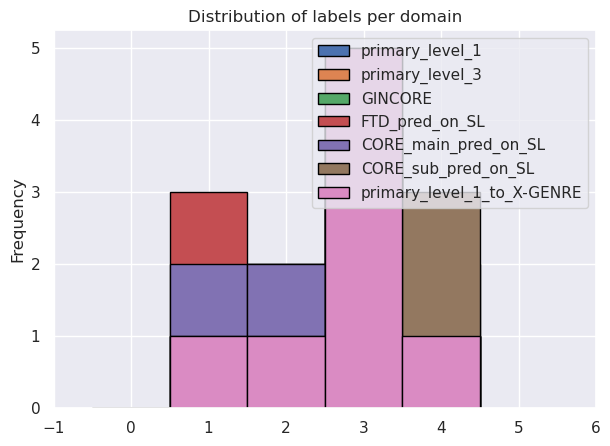

In [107]:
# Create distribution graphs for each of the genre schemata
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

for genre in genre_labels:
	plt.hist(distr_dict[genre], bins=np.arange(6)-0.5, label = f"{genre}", ec = "black")

plt.gca().set(title='Distribution of labels per domain', ylabel='Frequency')
plt.xlim(-1,6)
plt.legend();



In [111]:
list(distr_dict.keys())

['primary_level_1',
 'primary_level_3',
 'GINCORE',
 'FTD_pred_on_SL',
 'CORE_main_pred_on_SL',
 'CORE_sub_pred_on_SL',
 'primary_level_1_to_X-GENRE']

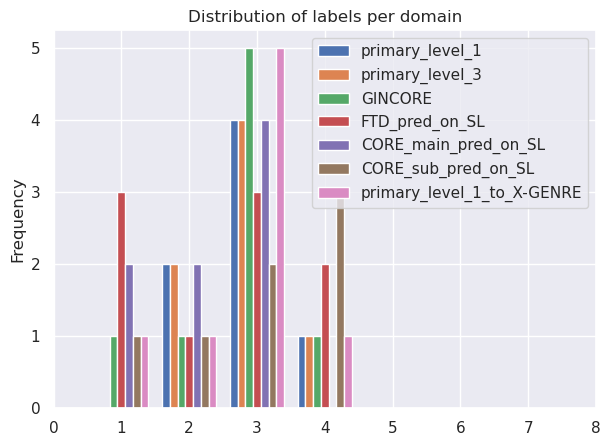

In [119]:
# Bins side by side
plt.hist(list(distr_dict.values()), bins = np.arange(6)-0.5,label=list(distr_dict.keys()))

plt.gca().set(title='Distribution of labels per domain', ylabel='Frequency', xlabel= 'Num')

plt.xlim(0,8)

plt.legend();

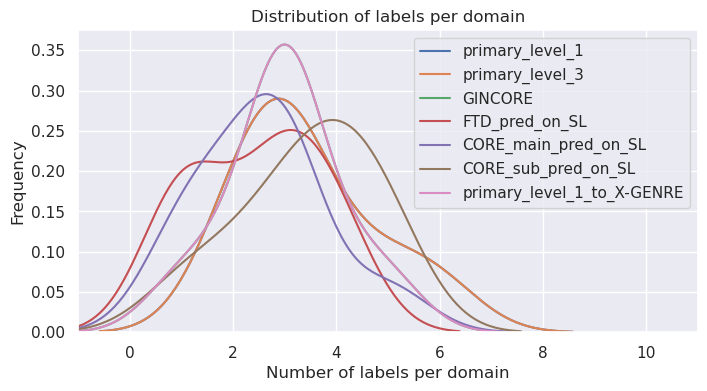

In [106]:
sns.set(rc={"figure.figsize": (8, 4)})

for genre in genre_labels:
	ax = sns.kdeplot(distr_dict[genre], x = range(10), label = f"{genre}")

plt.gca().set(title='Distribution of labels per domain', ylabel='Frequency', xlabel="Number of labels per domain")
plt.xlim(-1,11)
plt.legend();
plt.show()


In [9]:
# Create graphs based on most common label frequency

label_frequency_dict = {}

for i in genre_labels:
	label_frequency_dict[i] = list(merged_df[f"most_common_label_frequency_{i}"])

label_frequency_dict


{'primary_level_1': [60.0,
  33.33333333333333,
  60.0,
  40.0,
  60.0,
  60.0,
  40.0,
  80.0,
  50.0],
 'primary_level_3': [60.0,
  33.33333333333333,
  60.0,
  40.0,
  60.0,
  60.0,
  40.0,
  80.0,
  50.0],
 'GINCORE': [100.0,
  33.33333333333333,
  60.0,
  50.0,
  60.0,
  60.0,
  40.0,
  80.0,
  60.0],
 'FTD_pred_on_SL': [40.0, 100.0, 100.0, 60.0, 60.0, 40.0, 40.0, 100.0, 40.0],
 'CORE_main_pred_on_SL': [60.0,
  100.0,
  40.0,
  80.0,
  40.0,
  40.0,
  60.0,
  100.0,
  40.0],
 'CORE_sub_pred_on_SL': [40.0,
  33.33333333333333,
  40.0,
  60.0,
  40.0,
  60.0,
  60.0,
  100.0,
  60.0],
 'primary_level_1_to_X-GENRE': [100.0,
  33.33333333333333,
  60.0,
  50.0,
  60.0,
  60.0,
  40.0,
  80.0,
  60.0]}

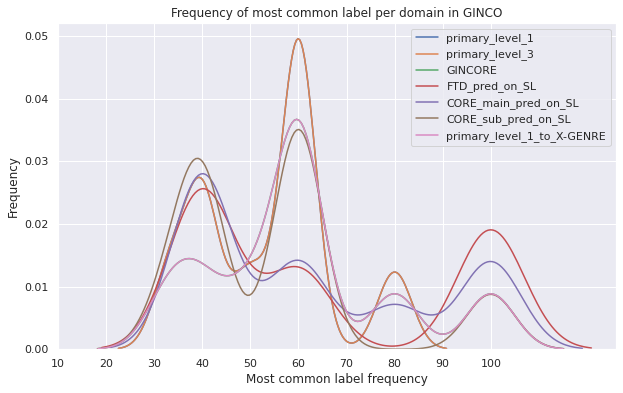

In [14]:
sns.set(rc={"figure.figsize": (10, 6)})
for genre in genre_labels:
	ax = sns.kdeplot(label_frequency_dict[genre], x = range(100), label = f"{genre}", bw_method = 0.25)

plt.gca().set(title='Frequency of most common label per domain in GINCO', ylabel='Frequency', xlabel="Most common label frequency")
ax.set_xticks([10,20,30,40,50,60,70,80,90,100])

plt.legend();
plt.show()


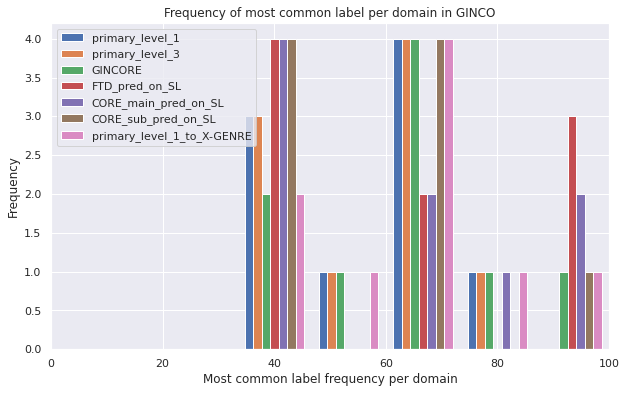

In [25]:
# Bins side by side
plt.hist(list(label_frequency_dict.values()), bins = 5,label=list(label_frequency_dict.keys()))

plt.gca().set(title='Frequency of most common label per domain in GINCO', ylabel='Frequency', xlabel= 'Most common label frequency per domain')

plt.xlim(0,100)

plt.legend();